# References
- Code References: https://medium.com/@girishajmera/fine-tuning-yolov10-for-custom-object-detection-7b12093691c8

- mAP50/mAP50_95: https://docs.ultralytics.com/guides/yolo-performance-metrics/#class-wise-metrics

- Reference of training result:https://github.com/ultralytics/ultralytics/issues/2789
  - box_om / box_oo
  - cls_om / cls_oo
  - dfl_om / dfl_oo

- Download yolov5 model from Pytorch: https://pytorch.org/hub/ultralytics_yolov5/

- How to freeze specific layers of the model based on Pytorch architecture: https://python.plainenglish.io/how-to-freeze-model-weights-in-pytorch-for-transfer-learning-step-by-step-tutorial-a533a58051ef

- How to build a YoLo model with ultralytics library from .pt tile: https://docs.ultralytics.com/modes/train/#usage-examples


# Needed Packages

In [2]:
# For download dataset from Kaggle
!pip install opendatasets -U
# For download dataset from roboflow
!pip install -q supervision roboflow
# For update the ultralytics library to prevent errors: https://github.com/THU-MIG/yolov10/issues/440
!pip install -U ultralytics
!pip install albumentations==1.4
# For yolov10 in ultralytics
!pip install git+https://github.com/THU-MIG/yolov10.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.7/882.7 kB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.6/123.6 kB 12.2 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.15
    Uninstalling albumentations-1.4.15:
      Successfully uninstalled albumentations-1.4.15
  Cloning https://github.com/THU-MIG/yolov10.git to /tmp/pip-req-build-3dtq4xo7
  Running command git clone --filter=blob:none --quiet https://github.com/THU-MIG/yolov10.git /tmp/pip-req-build-3dtq4xo7
  Resolved https://github.com/THU-MIG/yolov10.git to commit 6fbaf42b23f6709f4e34a51430587673e70e151d
  Installing build dependencies .

In [3]:
import os
import glob
import cv2
import pandas as pd

# for download the yolov5n model
import torch
# dataset related
import opendatasets as od
# model related
from ultralytics import YOLOv10, YOLO

# viusalization related
import matplotlib.pyplot as plt
import seaborn as sns

# Download Dataset From Kaggle

In [4]:
# Assign the Kaggle data set URL into variable
dataset = "https://www.kaggle.com/datasets/safurahajiheidari/kidney-stone-images"
# Using opendatasets let's download the data sets
od.download(dataset)''

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hsinpingwang0324
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/safurahajiheidari/kidney-stone-images


100%|██████████| 21.1M/21.1M [00:01<00:00, 17.7MB/s]


# Finetuning with Yolov10

In [7]:
checkpoint = "jameslahm/yolov10n"
yolov10 = YOLOv10.from_pretrained(checkpoint)
yolov10

YOLOv10(
  (model): YOLOv10DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track

In [12]:
import random
import torch
import numpy as np

In [15]:
def init_seeds(seed=0):
     # Initialize random number generator (RNG) seeds https://pytorch.org/docs/stable/notes/randomness.html
     # cudnn seed 0 settings are slower and more reproducible, else faster and less reproducible
     import torch.backends.cudnn as cudnn
     random.seed(seed)
     np.random.seed(seed)
     torch.manual_seed(seed)
     cudnn.benchmark, cudnn.deterministic = (False, True) if seed == 0 else (True, False)
init_seeds()

In [16]:
data_yaml_path = "/content/kidney-stone-images/data.yaml"
yolov10.train(data=data_yaml_path,
                epochs=100,
                patience=20,
                batch=4,
                imgsz=640)

New https://pypi.org/project/ultralytics/8.3.10 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov10n.yaml, data=/content/kidney-stone-images/data.yaml, epochs=100, time=None, patience=20, batch=4, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train222, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, 

train: Scanning /content/kidney-stone-images/train/labels.cache... 1054 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1054/1054 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/kidney-stone-images/valid/labels.cache... 123 images, 0 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<?, ?it/s]


Plotting labels to runs/detect/train222/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train222
Starting training for 100 epochs...

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      1/100      0.94G       3.67      13.95      2.771      2.681      22.15      2.142          3        640: 100%|██████████| 264/264 [01:12<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.19it/s]

                   all        123        325      0.244     0.0277     0.0287    0.00696



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      2/100      0.87G      2.872      3.998      1.779      2.904      5.894      1.634          2        640: 100%|██████████| 264/264 [00:30<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.28it/s]

                   all        123        325      0.369      0.314       0.25     0.0777



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      3/100     0.866G      2.592      2.616      1.583      2.677      3.601      1.435          1        640: 100%|██████████| 264/264 [00:29<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.97it/s]

                   all        123        325      0.332       0.31      0.247     0.0805



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      4/100     0.868G      2.479      2.056      1.462      2.632      2.659      1.333          5        640: 100%|██████████| 264/264 [00:29<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.90it/s]

                   all        123        325      0.424      0.415      0.359      0.106



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      5/100     0.868G      2.446      1.842      1.442      2.606      2.246      1.311          9        640: 100%|██████████| 264/264 [00:29<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.12it/s]

                   all        123        325      0.465      0.403      0.388      0.136



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      6/100     0.868G      2.397      1.702      1.429      2.517      2.027      1.291         10        640: 100%|██████████| 264/264 [00:30<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.52it/s]

                   all        123        325      0.493      0.434      0.405      0.133



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      7/100     0.868G      2.342       1.53       1.39      2.526      1.823      1.279          4        640: 100%|██████████| 264/264 [00:29<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.17it/s]

                   all        123        325      0.567      0.508      0.481      0.159



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      8/100     0.868G      2.296      1.485      1.374       2.48      1.814      1.263          9        640: 100%|██████████| 264/264 [00:29<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.45it/s]

                   all        123        325      0.512      0.519       0.48      0.163



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      9/100     0.868G      2.288      1.437      1.354      2.468      1.726      1.249          2        640: 100%|██████████| 264/264 [00:29<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.79it/s]

                   all        123        325      0.516      0.452      0.437      0.148



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     10/100     0.868G      2.251      1.387      1.369      2.414       1.67       1.24         14        640: 100%|██████████| 264/264 [00:30<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.03it/s]

                   all        123        325      0.549      0.498      0.479      0.169



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     11/100     0.868G      2.272      1.391      1.366      2.495      1.624      1.241          3        640: 100%|██████████| 264/264 [00:29<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.25it/s]

                   all        123        325       0.61      0.498      0.511      0.186



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     12/100     0.868G      2.309      1.368      1.328      2.512      1.617      1.212          9        640: 100%|██████████| 264/264 [00:29<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.70it/s]

                   all        123        325      0.602      0.517      0.528      0.184



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     13/100     0.868G      2.274      1.356      1.367      2.455      1.612      1.238         10        640: 100%|██████████| 264/264 [00:29<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.17it/s]

                   all        123        325      0.615      0.545      0.544      0.189



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     14/100     0.868G      2.227      1.269      1.334      2.377       1.53      1.202         14        640: 100%|██████████| 264/264 [00:30<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.94it/s]

                   all        123        325      0.638      0.529      0.521      0.176



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     15/100     0.868G      2.225      1.279      1.343      2.401      1.492      1.213         16        640: 100%|██████████| 264/264 [00:28<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.92it/s]

                   all        123        325      0.586      0.548      0.508      0.155



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     16/100     0.866G      2.192      1.259      1.326      2.391      1.502      1.206          2        640: 100%|██████████| 264/264 [00:29<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.16it/s]

                   all        123        325      0.656      0.565      0.578      0.198



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     17/100     0.868G      2.201      1.244      1.303      2.382       1.44      1.183          6        640: 100%|██████████| 264/264 [00:29<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.42it/s]

                   all        123        325      0.513      0.569      0.504       0.19



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     18/100     0.868G      2.204      1.251      1.328      2.398      1.451      1.212          8        640: 100%|██████████| 264/264 [00:30<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.45it/s]

                   all        123        325      0.603      0.566      0.533      0.182



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     19/100     0.868G      2.213      1.237      1.316      2.391      1.443      1.213         15        640: 100%|██████████| 264/264 [00:29<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.26it/s]

                   all        123        325      0.618      0.594       0.58      0.217



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     20/100     0.868G      2.165      1.186       1.29      2.339      1.421      1.177         13        640: 100%|██████████| 264/264 [00:29<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.73it/s]

                   all        123        325       0.64      0.551      0.562      0.187



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     21/100     0.868G      2.227      1.199       1.33      2.358      1.413      1.206          2        640: 100%|██████████| 264/264 [00:29<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.15it/s]

                   all        123        325      0.645      0.597      0.593      0.223



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     22/100     0.868G      2.152      1.161      1.293      2.357      1.382      1.183         10        640: 100%|██████████| 264/264 [00:30<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.97it/s]

                   all        123        325      0.625      0.594      0.584      0.209



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     23/100     0.868G      2.135       1.19      1.305      2.332      1.407      1.196          7        640: 100%|██████████| 264/264 [00:29<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.82it/s]

                   all        123        325      0.564      0.545      0.538      0.194



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     24/100     0.868G      2.152      1.199      1.279       2.34      1.434      1.163          4        640: 100%|██████████| 264/264 [00:29<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.14it/s]

                   all        123        325      0.663      0.581      0.593      0.222



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     25/100     0.868G      2.137      1.214      1.286      2.333      1.419      1.185          8        640: 100%|██████████| 264/264 [00:29<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.13it/s]

                   all        123        325      0.647      0.603       0.58      0.209



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     26/100     0.868G      2.153      1.156      1.326      2.343      1.393      1.199         10        640: 100%|██████████| 264/264 [00:29<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.93it/s]

                   all        123        325      0.589      0.591      0.582      0.221



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     27/100     0.868G       2.08      1.139      1.269      2.308      1.324      1.164          4        640: 100%|██████████| 264/264 [00:29<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.15it/s]

                   all        123        325      0.604      0.588      0.555      0.195



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     28/100     0.868G      2.081      1.148       1.25      2.279      1.356      1.158          3        640: 100%|██████████| 264/264 [00:29<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.82it/s]

                   all        123        325      0.648        0.6      0.609      0.231



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     29/100     0.868G      2.149      1.171      1.277      2.343      1.356      1.169          8        640: 100%|██████████| 264/264 [00:29<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.02it/s]

                   all        123        325      0.622      0.628      0.608      0.227



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     30/100     0.868G      2.114      1.131      1.283      2.344      1.348       1.18          1        640: 100%|██████████| 264/264 [00:30<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.76it/s]

                   all        123        325      0.685      0.566      0.618      0.241



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     31/100     0.868G      2.101      1.136      1.263      2.299      1.322      1.158         11        640: 100%|██████████| 264/264 [00:29<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.55it/s]

                   all        123        325      0.641      0.612      0.613      0.233



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     32/100     0.866G      2.121       1.12      1.256      2.357      1.302      1.161          7        640: 100%|██████████| 264/264 [00:29<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.81it/s]

                   all        123        325      0.645      0.582       0.58      0.231



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     33/100     0.868G      2.138      1.125       1.25      2.325      1.324      1.156          7        640: 100%|██████████| 264/264 [00:30<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.17it/s]

                   all        123        325      0.686      0.631      0.631      0.223



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     34/100     0.868G      2.093      1.107      1.262      2.301        1.3      1.165          4        640: 100%|██████████| 264/264 [00:30<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.30it/s]

                   all        123        325      0.652      0.618      0.607       0.23



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     35/100     0.868G      2.088      1.119      1.274      2.288      1.305      1.172          5        640: 100%|██████████| 264/264 [00:29<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.31it/s]

                   all        123        325      0.714      0.591      0.617      0.233



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     36/100     0.868G      2.065      1.099      1.264      2.254       1.31      1.158          2        640: 100%|██████████| 264/264 [00:29<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.07it/s]

                   all        123        325      0.628      0.591       0.59      0.208



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     37/100     0.868G      2.079      1.097      1.256      2.292      1.299      1.152          8        640: 100%|██████████| 264/264 [00:29<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.85it/s]

                   all        123        325      0.648      0.634      0.613      0.223



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     38/100     0.868G      2.092      1.083      1.258      2.327      1.286      1.166          3        640: 100%|██████████| 264/264 [00:29<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.07it/s]

                   all        123        325      0.646      0.606      0.584      0.226



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     39/100     0.868G      2.049      1.067      1.228      2.277      1.244      1.143          4        640: 100%|██████████| 264/264 [00:29<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.09it/s]

                   all        123        325      0.628      0.591      0.596      0.224



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     40/100     0.868G      2.089      1.087      1.241      2.286       1.29      1.145          0        640: 100%|██████████| 264/264 [00:29<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.86it/s]

                   all        123        325      0.649      0.585      0.607      0.232



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     41/100     0.868G      2.086      1.083       1.25      2.274      1.275      1.151          7        640: 100%|██████████| 264/264 [00:30<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.25it/s]

                   all        123        325      0.609      0.631      0.591       0.22



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     42/100     0.868G      2.047      1.091      1.267      2.234      1.294      1.161          9        640: 100%|██████████| 264/264 [00:29<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.18it/s]

                   all        123        325      0.614      0.592      0.571      0.207



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     43/100     0.868G      2.065      1.068      1.243      2.292      1.296      1.152         12        640: 100%|██████████| 264/264 [00:29<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.16it/s]

                   all        123        325       0.68      0.618      0.626      0.231



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     44/100     0.868G      2.045      1.055      1.255      2.234      1.275      1.143          5        640: 100%|██████████| 264/264 [00:29<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.36it/s]

                   all        123        325      0.672      0.588      0.589      0.216



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     45/100     0.868G       2.02      1.057      1.239      2.237      1.258      1.144         12        640: 100%|██████████| 264/264 [00:29<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.84it/s]

                   all        123        325      0.656      0.609      0.612      0.234



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     46/100     0.868G      2.054      1.059      1.233      2.236      1.259      1.139          5        640: 100%|██████████| 264/264 [00:29<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.52it/s]

                   all        123        325      0.634      0.603      0.594      0.218



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     47/100     0.868G       2.05      1.081        1.2       2.26      1.259       1.12          8        640: 100%|██████████| 264/264 [00:30<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.70it/s]

                   all        123        325      0.705      0.648      0.639      0.243



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     48/100     0.868G      2.014      1.044      1.242      2.236       1.23      1.155          2        640: 100%|██████████| 264/264 [00:29<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.47it/s]

                   all        123        325      0.653      0.648      0.644      0.243



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     49/100     0.868G      2.042      1.083      1.229      2.251       1.25       1.14          4        640: 100%|██████████| 264/264 [00:30<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.16it/s]

                   all        123        325      0.642      0.637      0.607      0.223



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     50/100     0.868G      2.034      1.044        1.2      2.223       1.24      1.117          6        640: 100%|██████████| 264/264 [00:30<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.91it/s]


                   all        123        325      0.663      0.597      0.634      0.237

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     51/100     0.868G      1.998     0.9982      1.218      2.199      1.187      1.132         15        640: 100%|██████████| 264/264 [00:29<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.95it/s]

                   all        123        325      0.736      0.615       0.64      0.247



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     52/100     0.868G      2.011      1.046       1.24      2.219      1.221       1.14          2        640: 100%|██████████| 264/264 [00:29<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.12it/s]

                   all        123        325      0.664      0.583      0.603      0.217



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     53/100     0.866G      2.015      1.043      1.215       2.23      1.214      1.126          3        640: 100%|██████████| 264/264 [00:29<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.59it/s]

                   all        123        325      0.662      0.658      0.663      0.255



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     54/100     0.868G      1.997      1.011      1.229      2.236       1.21       1.14          2        640: 100%|██████████| 264/264 [00:29<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.05it/s]

                   all        123        325      0.661      0.624      0.644      0.249



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     55/100     0.868G      2.008      1.016      1.239      2.217      1.203       1.14          6        640: 100%|██████████| 264/264 [00:30<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.99it/s]

                   all        123        325      0.692      0.594      0.622      0.224



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     56/100     0.868G      1.975      0.984      1.214      2.195      1.202      1.125         10        640: 100%|██████████| 264/264 [00:29<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.62it/s]

                   all        123        325      0.646      0.588      0.596      0.215



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     57/100     0.868G      2.016     0.9985      1.228      2.218      1.204      1.135          7        640: 100%|██████████| 264/264 [00:29<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.18it/s]

                   all        123        325      0.677      0.622      0.638      0.223



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     58/100     0.868G      1.984     0.9866      1.199      2.204      1.179      1.115         14        640: 100%|██████████| 264/264 [00:30<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.89it/s]

                   all        123        325      0.683      0.637      0.625       0.24



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     59/100     0.868G      2.022      1.013        1.2      2.247      1.211      1.109         13        640: 100%|██████████| 264/264 [00:29<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.63it/s]

                   all        123        325      0.613      0.634      0.609      0.218



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     60/100     0.868G      1.919          1      1.197      2.155      1.188      1.113         10        640: 100%|██████████| 264/264 [00:29<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.08it/s]

                   all        123        325      0.718      0.615      0.661      0.248



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     61/100     0.866G       2.03      1.028      1.233      2.255      1.215      1.143          7        640: 100%|██████████| 264/264 [00:30<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.00it/s]

                   all        123        325      0.671      0.659      0.661      0.238



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     62/100     0.868G      1.992      1.013      1.219      2.223      1.188      1.129          8        640: 100%|██████████| 264/264 [00:29<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.82it/s]

                   all        123        325      0.716      0.643      0.683      0.269



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     63/100     0.868G      2.006      1.036       1.22      2.201      1.221      1.127          3        640: 100%|██████████| 264/264 [00:30<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.21it/s]

                   all        123        325       0.65      0.628      0.631      0.242



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     64/100     0.868G      1.975     0.9903      1.198      2.207      1.183      1.114          5        640: 100%|██████████| 264/264 [00:30<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.98it/s]

                   all        123        325      0.716      0.596      0.637      0.241



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     65/100     0.868G      1.962     0.9955      1.215      2.195      1.183      1.121         15        640: 100%|██████████| 264/264 [00:29<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.92it/s]

                   all        123        325      0.715      0.646      0.677      0.272



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     66/100     0.868G      1.989      0.984      1.212       2.19      1.159      1.119          1        640: 100%|██████████| 264/264 [00:30<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.84it/s]

                   all        123        325      0.671      0.666       0.65      0.241



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     67/100     0.868G      1.962     0.9852      1.193      2.186      1.172      1.111         15        640: 100%|██████████| 264/264 [00:30<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.59it/s]

                   all        123        325      0.687      0.652      0.671      0.259



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     68/100     0.868G      1.964     0.9762      1.178      2.166      1.151      1.099          4        640: 100%|██████████| 264/264 [00:30<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.64it/s]

                   all        123        325      0.697      0.634      0.656      0.256



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     69/100     0.868G      1.963     0.9917      1.203      2.172      1.176      1.113          8        640: 100%|██████████| 264/264 [00:30<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.08it/s]

                   all        123        325      0.652      0.637      0.619      0.217



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     70/100     0.868G       1.97     0.9794      1.204      2.187      1.143      1.119         21        640: 100%|██████████| 264/264 [00:30<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.33it/s]

                   all        123        325      0.681      0.631      0.654      0.247



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     71/100     0.868G       1.95     0.9942      1.206      2.173      1.157      1.125          6        640: 100%|██████████| 264/264 [00:29<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.16it/s]

                   all        123        325       0.64      0.671      0.659      0.252



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     72/100     0.868G      1.948     0.9721      1.209      2.172      1.134      1.118         16        640: 100%|██████████| 264/264 [00:30<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.89it/s]

                   all        123        325       0.69      0.622       0.64      0.237



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     73/100     0.868G      1.926     0.9501        1.2      2.172      1.177      1.119          6        640: 100%|██████████| 264/264 [00:30<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.23it/s]

                   all        123        325      0.708       0.64      0.676      0.263



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     74/100     0.868G      1.946     0.9523      1.189      2.148       1.12      1.106          5        640: 100%|██████████| 264/264 [00:30<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.08it/s]

                   all        123        325      0.705      0.633      0.661       0.25



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     75/100     0.868G      1.912     0.9617      1.199      2.139      1.118      1.121          2        640: 100%|██████████| 264/264 [00:30<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.96it/s]

                   all        123        325      0.681      0.665      0.661      0.251



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     76/100     0.868G      1.914     0.9503      1.201      2.163      1.147      1.122          3        640: 100%|██████████| 264/264 [00:29<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.90it/s]

                   all        123        325        0.7      0.655      0.671      0.257



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     77/100     0.868G      1.931     0.9437       1.19      2.178      1.132        1.1          9        640: 100%|██████████| 264/264 [00:29<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.35it/s]

                   all        123        325      0.686      0.613       0.62      0.229



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     78/100     0.866G      1.932     0.9483      1.182      2.163      1.148      1.107          5        640: 100%|██████████| 264/264 [00:31<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.39it/s]

                   all        123        325      0.728      0.635      0.671      0.259



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     79/100     0.868G      1.886     0.9259      1.189      2.115      1.117      1.104          3        640: 100%|██████████| 264/264 [00:30<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.46it/s]

                   all        123        325      0.724      0.655      0.681      0.262



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     80/100     0.868G      1.911     0.9305      1.179      2.158      1.122      1.099          2        640: 100%|██████████| 264/264 [00:30<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.96it/s]

                   all        123        325      0.722      0.662      0.697      0.268



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     81/100     0.872G      1.882     0.9272      1.196      2.154      1.133      1.126          5        640: 100%|██████████| 264/264 [00:30<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.40it/s]

                   all        123        325      0.713      0.636      0.679      0.254



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     82/100     0.866G      1.871     0.9145      1.172      2.129      1.088      1.098          9        640: 100%|██████████| 264/264 [00:32<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.87it/s]

                   all        123        325      0.711      0.668      0.692      0.257



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     83/100     0.868G      1.925     0.9358      1.154      2.142      1.106      1.086          2        640: 100%|██████████| 264/264 [00:32<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.33it/s]

                   all        123        325      0.715      0.671      0.702      0.272



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     84/100     0.868G      1.893     0.9455      1.192      2.128      1.134      1.119         24        640: 100%|██████████| 264/264 [00:32<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.40it/s]

                   all        123        325      0.677      0.601       0.64      0.235



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     85/100     0.868G      1.877     0.9233      1.173      2.121      1.116      1.099          2        640: 100%|██████████| 264/264 [00:32<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 12.13it/s]

                   all        123        325      0.731      0.597      0.674       0.26



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     86/100     0.868G      1.883     0.9298       1.17      2.112      1.094      1.099         14        640: 100%|██████████| 264/264 [00:31<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.17it/s]

                   all        123        325      0.681      0.668      0.682      0.257



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     87/100     0.868G      1.881     0.9502      1.169      2.158       1.11      1.105          4        640: 100%|██████████| 264/264 [00:30<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.01it/s]

                   all        123        325      0.675      0.643      0.665      0.246



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     88/100     0.868G      1.859     0.9017      1.159       2.12      1.052      1.086          1        640: 100%|██████████| 264/264 [00:29<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.63it/s]

                   all        123        325      0.703      0.655      0.668      0.256



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     89/100     0.868G      1.863     0.9066      1.173      2.119      1.094      1.103          7        640: 100%|██████████| 264/264 [00:30<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.00it/s]

                   all        123        325      0.696      0.655      0.674      0.254



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     90/100     0.868G      1.886     0.9136      1.171       2.13      1.108      1.098         11        640: 100%|██████████| 264/264 [00:30<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.78it/s]

                   all        123        325      0.693      0.677      0.684      0.262


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     91/100     0.868G      1.872     0.9158      1.208      2.059      1.096       1.12          4        640: 100%|██████████| 264/264 [00:30<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.71it/s]

                   all        123        325      0.718      0.646      0.682      0.266



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     92/100     0.868G      1.843     0.8933      1.177      2.049      1.057      1.107          2        640: 100%|██████████| 264/264 [00:30<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.88it/s]

                   all        123        325      0.662      0.686      0.682      0.261



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     93/100     0.868G      1.837     0.8945      1.189      2.042      1.075      1.114          2        640: 100%|██████████| 264/264 [00:31<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.52it/s]

                   all        123        325      0.676      0.671       0.66      0.249



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     94/100     0.868G      1.834     0.8697      1.164      2.066      1.048      1.097          3        640: 100%|██████████| 264/264 [00:29<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.84it/s]

                   all        123        325      0.713      0.655      0.696      0.263



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     95/100     0.868G      1.847     0.8909       1.19       2.04       1.07      1.108          2        640: 100%|██████████| 264/264 [00:29<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.13it/s]

                   all        123        325      0.686      0.662      0.665      0.255



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     96/100     0.868G      1.834     0.8846      1.187      2.023      1.064      1.105          6        640: 100%|██████████| 264/264 [00:29<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.27it/s]

                   all        123        325        0.7      0.671       0.69      0.265



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     97/100     0.868G      1.841     0.8936      1.172      2.016      1.043      1.101          6        640: 100%|██████████| 264/264 [00:30<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.55it/s]

                   all        123        325      0.718      0.667       0.69      0.258



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     98/100     0.868G      1.809      0.872      1.168      2.045      1.019      1.101          2        640: 100%|██████████| 264/264 [00:30<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.64it/s]

                   all        123        325      0.721      0.668      0.689      0.262



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


     99/100     0.866G      1.794     0.8694      1.165      2.021       1.05      1.092          3        640: 100%|██████████| 264/264 [00:30<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.71it/s]

                   all        123        325      0.717      0.665      0.689      0.258



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


    100/100     0.868G      1.823      0.881      1.173      2.018      1.032      1.107          2        640: 100%|██████████| 264/264 [00:29<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.70it/s]

                   all        123        325      0.697      0.665      0.686      0.257



100 epochs completed in 0.903 hours.
Optimizer stripped from runs/detect/train222/weights/last.pt, 5.8MB
Optimizer stripped from runs/detect/train222/weights/best.pt, 5.8MB

Validating runs/detect/train222/weights/best.pt...
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2694806 parameters, 0 gradients, 8.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 10.51it/s]


                   all        123        325      0.715      0.671      0.702      0.272
Speed: 0.2ms preprocess, 8.4ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/train222


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7df4105091b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# Finetuning Yolov5

In [25]:
# Download the yolov5n model
_ = torch.hub.load('ultralytics/yolov5', 'yolov5n', pretrained=True)
# Load a model
yolov5 = YOLO("yolov5n.pt")

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-12 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients, 4.5 GFLOPs
Adding AutoShape... 


PRO TIP 💡 Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



In [26]:
yolov5.train(data=data_yaml_path,
                epochs=100,
                patience=20,
                batch=4,
                imgsz=640)

New https://pypi.org/project/ultralytics/8.3.10 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov5n.pt, data=/content/kidney-stone-images/data.yaml, epochs=100, time=None, patience=20, batch=4, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=

train: Scanning /content/kidney-stone-images/train/labels.cache... 1054 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1054/1054 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/kidney-stone-images/valid/labels.cache... 123 images, 0 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100     0.755G      2.303      3.503      1.292          3        640: 100%|██████████| 264/264 [00:24<00:00, 10.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.32it/s]


                   all        123        325      0.528      0.481      0.443      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100     0.763G      2.262      2.148      1.297          2        640: 100%|██████████| 264/264 [00:21<00:00, 12.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.49it/s]

                   all        123        325      0.649       0.52      0.534       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100     0.751G      2.231      1.652      1.334          1        640: 100%|██████████| 264/264 [00:21<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.08it/s]

                   all        123        325      0.715      0.551      0.589      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100     0.751G      2.209      1.431      1.276          5        640: 100%|██████████| 264/264 [00:20<00:00, 12.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.24it/s]

                   all        123        325      0.641       0.57      0.543      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100     0.751G      2.174      1.371      1.273          9        640: 100%|██████████| 264/264 [00:20<00:00, 12.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.23it/s]

                   all        123        325       0.68      0.563      0.568      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100     0.751G      2.186      1.299      1.295         10        640: 100%|██████████| 264/264 [00:20<00:00, 12.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.59it/s]

                   all        123        325      0.727       0.59      0.583      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100     0.751G      2.155      1.274      1.258          4        640: 100%|██████████| 264/264 [00:21<00:00, 12.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.94it/s]

                   all        123        325      0.749      0.578      0.624      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100     0.732G      2.128      1.226      1.245          9        640: 100%|██████████| 264/264 [00:22<00:00, 11.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.49it/s]

                   all        123        325      0.644      0.612      0.607      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100     0.732G      2.155      1.209      1.262          2        640: 100%|██████████| 264/264 [00:22<00:00, 11.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.65it/s]

                   all        123        325      0.716      0.572      0.565      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100     0.732G      2.098      1.206      1.257         14        640: 100%|██████████| 264/264 [00:22<00:00, 11.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.51it/s]

                   all        123        325      0.697      0.631      0.629      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100     0.732G      2.131      1.226      1.257          3        640: 100%|██████████| 264/264 [00:22<00:00, 11.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.59it/s]

                   all        123        325      0.648       0.56      0.543      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100     0.732G      2.153      1.188      1.237          9        640: 100%|██████████| 264/264 [00:23<00:00, 11.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.67it/s]

                   all        123        325       0.65      0.623      0.578        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100     0.732G      2.125      1.184       1.26         10        640: 100%|██████████| 264/264 [00:22<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.47it/s]

                   all        123        325      0.716       0.64      0.647      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100     0.732G       2.07      1.145      1.242         14        640: 100%|██████████| 264/264 [00:21<00:00, 12.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.44it/s]

                   all        123        325      0.765      0.602      0.642      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100     0.732G      2.071      1.135      1.232         16        640: 100%|██████████| 264/264 [00:20<00:00, 12.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.33it/s]

                   all        123        325      0.782      0.628      0.651      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100     0.732G      2.069      1.128       1.23          2        640: 100%|██████████| 264/264 [00:20<00:00, 12.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.22it/s]

                   all        123        325      0.758      0.655      0.673      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100     0.732G      2.078      1.147      1.221          6        640: 100%|██████████| 264/264 [00:22<00:00, 11.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.36it/s]

                   all        123        325      0.749      0.631      0.647      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100     0.732G      2.092      1.146      1.228          8        640: 100%|██████████| 264/264 [00:20<00:00, 12.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.27it/s]

                   all        123        325      0.717      0.648      0.673       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100     0.732G       2.09      1.147      1.227         15        640: 100%|██████████| 264/264 [00:21<00:00, 12.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.67it/s]

                   all        123        325      0.688      0.672      0.645      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100     0.732G      2.046      1.104      1.213         13        640: 100%|██████████| 264/264 [00:21<00:00, 12.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.61it/s]

                   all        123        325      0.803      0.627      0.641      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100     0.732G      2.074      1.123      1.225          2        640: 100%|██████████| 264/264 [00:21<00:00, 12.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.65it/s]

                   all        123        325      0.682      0.628      0.635      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100     0.732G      2.046      1.061      1.213         10        640: 100%|██████████| 264/264 [00:21<00:00, 12.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.99it/s]

                   all        123        325      0.757      0.663      0.683      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100     0.732G      2.048      1.092      1.235          7        640: 100%|██████████| 264/264 [00:22<00:00, 12.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.68it/s]

                   all        123        325      0.749      0.615      0.644      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100     0.732G      2.031        1.1      1.201          4        640: 100%|██████████| 264/264 [00:21<00:00, 12.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.60it/s]

                   all        123        325      0.749      0.661      0.692      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100     0.732G      2.021      1.095      1.203          8        640: 100%|██████████| 264/264 [00:21<00:00, 12.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.63it/s]

                   all        123        325      0.783      0.652      0.684      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100     0.732G      2.013      1.098       1.23         10        640: 100%|██████████| 264/264 [00:21<00:00, 12.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.66it/s]

                   all        123        325       0.78      0.655      0.704      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100     0.732G      1.977      1.061      1.187          4        640: 100%|██████████| 264/264 [00:21<00:00, 12.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.86it/s]

                   all        123        325      0.755      0.671      0.663      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100     0.732G       1.99      1.045      1.187          3        640: 100%|██████████| 264/264 [00:22<00:00, 11.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.70it/s]

                   all        123        325      0.768      0.658       0.68      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100     0.732G      2.038      1.116      1.195          8        640: 100%|██████████| 264/264 [00:20<00:00, 12.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.28it/s]

                   all        123        325      0.781      0.677      0.711      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100     0.732G      2.023      1.041      1.204          1        640: 100%|██████████| 264/264 [00:21<00:00, 12.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.38it/s]

                   all        123        325      0.732      0.665      0.693      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100     0.732G      1.994       1.06      1.181         11        640: 100%|██████████| 264/264 [00:21<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.18it/s]

                   all        123        325      0.725      0.686      0.695      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100     0.732G      2.008      1.052      1.178          7        640: 100%|██████████| 264/264 [00:20<00:00, 12.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.16it/s]

                   all        123        325      0.767      0.665      0.706      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100     0.732G      2.004      1.057      1.166          7        640: 100%|██████████| 264/264 [00:21<00:00, 12.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.13it/s]

                   all        123        325      0.745      0.695      0.701      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100     0.732G      1.967      1.041       1.18          4        640: 100%|██████████| 264/264 [00:21<00:00, 12.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.25it/s]

                   all        123        325       0.81       0.71      0.732        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100     0.732G      1.972      1.055      1.189          5        640: 100%|██████████| 264/264 [00:20<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.26it/s]

                   all        123        325      0.776      0.668      0.705      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100     0.732G      1.948      1.028      1.193          2        640: 100%|██████████| 264/264 [00:20<00:00, 12.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.04it/s]

                   all        123        325      0.803      0.652      0.685      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100     0.732G      1.997      1.018       1.19          8        640: 100%|██████████| 264/264 [00:20<00:00, 12.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.62it/s]

                   all        123        325      0.801      0.689       0.73      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100     0.732G       1.97       1.03      1.169          3        640: 100%|██████████| 264/264 [00:20<00:00, 12.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.55it/s]

                   all        123        325      0.783      0.686      0.735      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100     0.732G      1.919      1.014      1.144          4        640: 100%|██████████| 264/264 [00:21<00:00, 12.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.36it/s]

                   all        123        325      0.795      0.657      0.683      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100     0.732G      1.974      1.034      1.162          0        640: 100%|██████████| 264/264 [00:20<00:00, 12.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.20it/s]

                   all        123        325      0.811      0.686      0.727      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100     0.732G      1.961      1.021      1.169          7        640: 100%|██████████| 264/264 [00:21<00:00, 12.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.74it/s]

                   all        123        325      0.762      0.689      0.687      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100     0.732G      1.918      1.013       1.18          9        640: 100%|██████████| 264/264 [00:20<00:00, 12.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.62it/s]

                   all        123        325      0.795       0.67      0.695      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100     0.732G      1.953       1.01      1.164         12        640: 100%|██████████| 264/264 [00:20<00:00, 12.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.56it/s]

                   all        123        325      0.769      0.705      0.707      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100     0.732G      1.909      0.987      1.159          5        640: 100%|██████████| 264/264 [00:20<00:00, 12.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.79it/s]

                   all        123        325      0.778      0.705      0.717      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100     0.732G      1.905     0.9995      1.159         12        640: 100%|██████████| 264/264 [00:22<00:00, 11.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.77it/s]

                   all        123        325      0.758      0.645      0.707      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100     0.732G      1.928     0.9878      1.145          5        640: 100%|██████████| 264/264 [00:20<00:00, 12.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.76it/s]

                   all        123        325      0.758      0.702        0.7      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100     0.732G      1.934     0.9957      1.127          8        640: 100%|██████████| 264/264 [00:20<00:00, 12.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.92it/s]

                   all        123        325      0.826      0.708      0.724      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100     0.732G      1.904     0.9865      1.156          2        640: 100%|██████████| 264/264 [00:20<00:00, 12.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.82it/s]

                   all        123        325       0.75      0.682      0.718      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100     0.732G      1.925     0.9726      1.148          4        640: 100%|██████████| 264/264 [00:20<00:00, 12.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.71it/s]

                   all        123        325      0.796      0.695      0.704      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100     0.732G      1.912     0.9667      1.126          6        640: 100%|██████████| 264/264 [00:21<00:00, 12.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.30it/s]

                   all        123        325      0.763      0.698      0.717      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100     0.732G      1.897      0.939      1.149         15        640: 100%|██████████| 264/264 [00:21<00:00, 12.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.81it/s]

                   all        123        325      0.835       0.68      0.732      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100     0.732G      1.891     0.9554      1.154          2        640: 100%|██████████| 264/264 [00:20<00:00, 12.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.35it/s]

                   all        123        325        0.8      0.686      0.716      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100     0.732G      1.901     0.9747      1.136          3        640: 100%|██████████| 264/264 [00:20<00:00, 12.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.23it/s]

                   all        123        325      0.806      0.692      0.717      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100     0.732G      1.872     0.9471      1.155          2        640: 100%|██████████| 264/264 [00:20<00:00, 12.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.21it/s]

                   all        123        325       0.76      0.732      0.729      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100     0.732G      1.864     0.9338      1.151          6        640: 100%|██████████| 264/264 [00:20<00:00, 12.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.50it/s]

                   all        123        325      0.749      0.671      0.691      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100     0.732G      1.876     0.9063      1.143         10        640: 100%|██████████| 264/264 [00:22<00:00, 11.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 13.47it/s]

                   all        123        325      0.727      0.671      0.683       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100     0.732G      1.883     0.9347       1.15          7        640: 100%|██████████| 264/264 [00:20<00:00, 12.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.23it/s]

                   all        123        325      0.772      0.671      0.707      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100     0.732G      1.875     0.9095      1.124         14        640: 100%|██████████| 264/264 [00:20<00:00, 12.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00, 14.28it/s]

                   all        123        325      0.785      0.717      0.724      0.292
Stopping training early as no improvement observed in last 20 epochs. Best results observed at epoch 38, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



58 epochs completed in 0.370 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv5n summary (fused): 193 layers, 2503139 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:01<00:00,  9.60it/s]


                   all        123        325      0.784      0.686      0.735      0.302
Speed: 0.3ms preprocess, 5.0ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7df48cf017e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [30]:
def visualizing_result(result_csv_path):
    df = pd.read_csv(result_csv_path)
    train_cols = [colname for colname in df.columns.tolist() if "train" in colname]
    train_history = df[train_cols]

    val_cols = [colname for colname in df.columns.tolist() if "val" in colname]
    val_history = df[val_cols]

    n_rows = len(train_cols) // 3

    fig, ax = plt.subplots(n_rows, 3, figsize=(15,5*n_rows))

    for idx in range(n_rows*3):
        df = pd.DataFrame()
        title = train_history.columns.tolist()[idx].split("/")[-1]
        df["train"] = train_history.iloc[:, idx]
        df["val"] = val_history.iloc[:, idx]
        if n_rows > 1:
            if idx <= 2:
                df.plot(ax=ax[0, idx])
                ax[0, idx].set_title(title)
            else:
                df.plot(ax=ax[1, idx%3])
                ax[1, idx%3].set_title(title)
        else:
            df.plot(ax=ax[idx])
            ax[idx].set_title(title)
    return fig

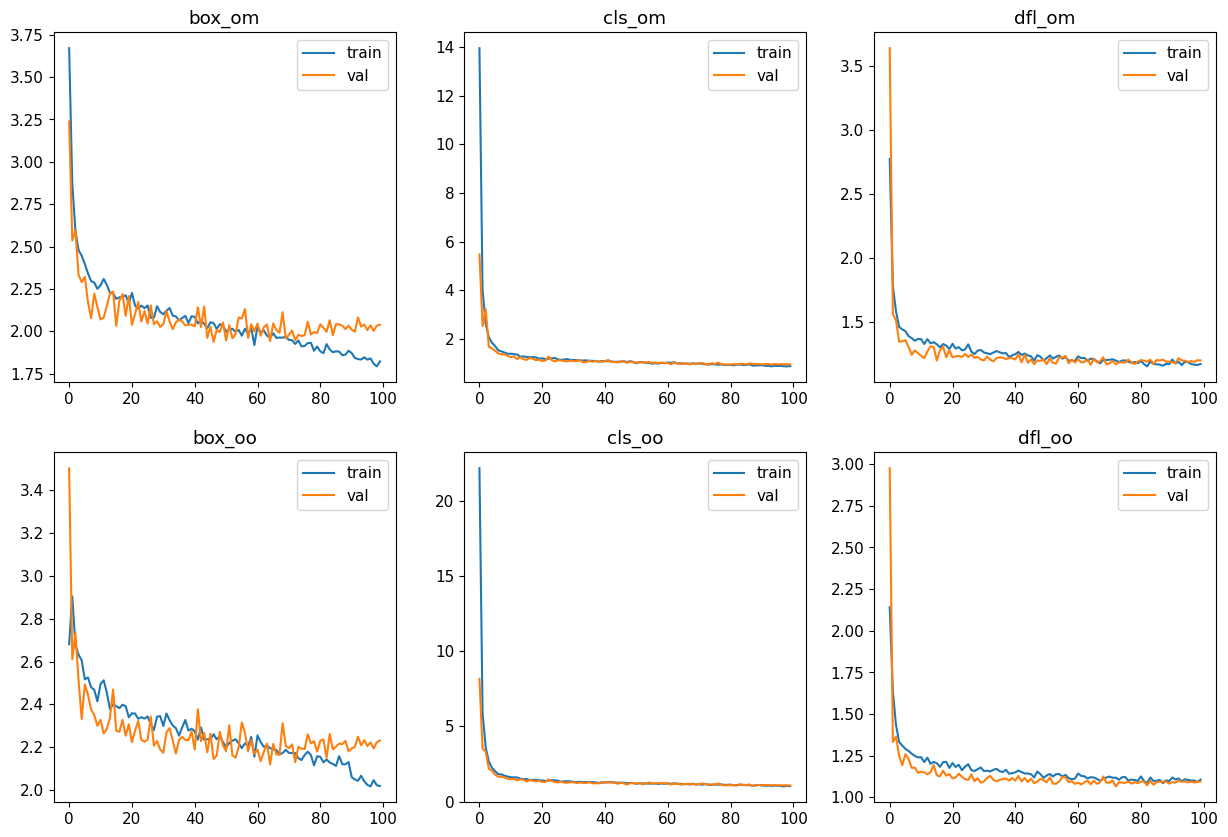

In [31]:
# yolov10
result_csv_path = "/content/yolov10_runs/detect/train222/results.csv"
fig = visualizing_result(result_csv_path)
fig

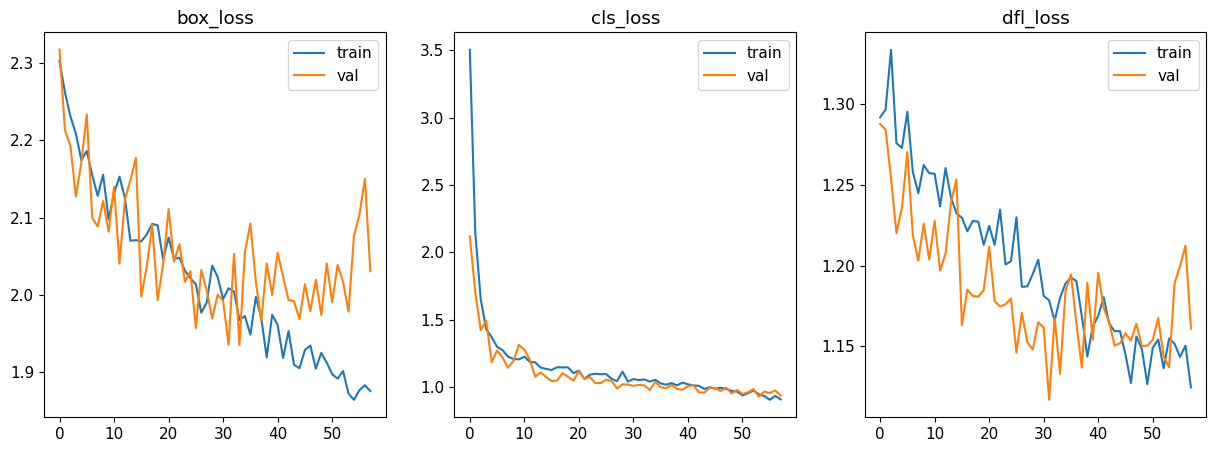

In [32]:
# yolov5
result_csv_path = "/content/yolov5_runs/detect/train/results.csv"
fig = visualizing_result(result_csv_path)
fig

# Visualization

In [60]:
def get_bbox(bbox, img_w, img_h, normalize=True):
    xywh = bbox
    c_x, c_y, w, h = xywh
    if normalize:
        c_x += c_x*img_w
        c_y += c_y*img_h
        w += w*img_w
        h += h*img_h
    x1, y1 = int(c_x-w//2), int(c_y-h//2)
    x2, y2 = int(c_x+w//2), int(c_y+h//2)
    return (x1, y1), (x2, y2)

def draw_bbox(img, p1, p2, color, ax, loc_x_y, title):
    cv2.rectangle(img, p1, p2, color=color, thickness=2)
    ax[loc_x_y[0], loc_x_y[1]].imshow(img)
    ax[loc_x_y[0], loc_x_y[1]].set_title(f'{title}')

def visualizaing_8samples(img_paths):
    fig, ax = plt.subplots(2,4, figsize=(15, 5))
    label_paths = list(map(lambda x:x.replace("/images/", "/labels/").replace(".jpg", ".txt"), img_paths))

    for idx, (img_path,labels_path) in enumerate(zip(img_paths, label_paths)):
        print(img_path.split("/")[-1])
        img = cv2.imread(img_path)
        img_h, img_w, _ = img.shape
        with open(labels_path, "r") as f:
            labels = f.readlines()
        labels = [[float(p) for p in label.replace("\n","").split()] for label in labels]
        for label in labels:
            xywh = label[1:]
            p1, p2 = get_bbox(xywh, img_w, img_h, normalize=True)
            cv2.rectangle(img, p1, p2, color=(0,255,0), thickness=2)
        if idx <= 3:
            ax[0, idx].imshow(img)
            ax[0, idx].set_title(img_path.split("/")[-1][-9:])

        else:
            i = idx%4
            ax[1, i].imshow(img)
            ax[1, i].set_title(img_path.split("/")[-1][-9:])

    fig.tight_layout()
    return fig

def visualizing_4inferences(model, img_paths):
    fig, ax = plt.subplots(2, 4, figsize=(15, 5))
    label_paths = list(map(lambda x:x.replace("/images/", "/labels/").replace(".jpg", ".txt"), img_paths))

    for idx, (img_path, label_path) in enumerate(zip(img_paths, label_paths)):
        title_prefix = img_path.split("/")[-1][-9:]
        img = cv2.imread(img_path)
        img_true = img.copy()
        img_pred = img.copy()
        img_h, img_w, _ = img.shape

        with open(label_path, "r") as f:
            labels = f.readlines()
        labels = [[float(p) for p in label.replace("\n","").split()] for label in labels]
        for label in labels:
            gt_bbox = label[1:]
            p1, p2 = get_bbox(gt_bbox, img_w, img_h)
            draw_bbox(img_true, p1, p2, color=(0,255,0), ax=ax, loc_x_y=[0, idx], title=f"{title_prefix}_Ground-Truth")

        output = model(img)
        pred_bboxes = output[0].boxes.xywh.detach().cpu().numpy()
        for pred_box in pred_bboxes:
            p1, p2 = get_bbox(pred_box, img_w, img_h, normalize=False)
            draw_bbox(img_pred, p1, p2, color=(255,0,0), ax=ax, loc_x_y=[1, idx], title=f"{title_prefix}_Prediction")

    fig.tight_layout()
    return fig

def visualizing_4inferences_with_different_model(img_paths, model1, model2, model_tags):
    fig, ax = plt.subplots(3,4, figsize=(15, 10))
    label_paths = list(map(lambda x:x.replace("/images/", "/labels/").replace(".jpg", ".txt"), img_paths))

    for idx, (img_path, label_path) in enumerate(zip(img_paths, label_paths)):
        img = cv2.imread(img_path)
        img_true, img_pred1, img_pred2 = img.copy(), img.copy(), img.copy()
        img_h, img_w, _ = img.shape
        title_prefix = img_path.split("/")[-1][-9:]

        with open(label_path, "r") as f:
            labels = f.readlines()
        labels = [[float(p) for p in label.replace("\n","").split()] for label in labels]
        for label in labels:
            gt_bbox = label[1:]
            p1, p2 = get_bbox(gt_bbox, img_w, img_h)
            draw_bbox(img_true, p1, p2, color=(0,255,0), ax=ax, loc_x_y=[0, idx], title=f"{title_prefix}_Ground-Truth")

        output = model1(img)
        pred_bboxes = output[0].boxes.xywh.detach().cpu().numpy()
        for pred_box in pred_bboxes:
            p1, p2 = get_bbox(pred_box, img_w, img_h, normalize=False)
            draw_bbox(img_pred1, p1, p2, color=(255,0,0), ax=ax, loc_x_y=[1, idx], title=f"{title_prefix}_{model_tags[0]}")

        output = model2(img)
        pred_bboxes = output[0].boxes.xywh.detach().cpu().numpy()
        for pred_box in pred_bboxes:
            p1, p2 = get_bbox(pred_box, img_w, img_h, normalize=False)
            draw_bbox(img_pred2, p1, p2, color=(255,255,0), ax=ax, loc_x_y=[2, idx], title=f"{title_prefix}_{model_tags[1]}")

    fig.tight_layout()
    return fig


1-3-46-670589-33-1-63711136318733215900001-5061053861274303645_png_jpg.rf.cba73fd2ee2ff35df3fced2ba5ab1b4f.jpg
1-3-46-670589-33-1-63714778964331537000001-5526858049613921924_png_jpg.rf.12c3517e09778d9e8081c6e542e9f914.jpg
1-3-46-670589-33-1-63711143286222733500001-5246473411028221538_png_jpg.rf.470c2feadee6eb3820ce44be761aab60.jpg
1-3-46-670589-33-1-63716668589257569900001-5557874925587535144_png_jpg.rf.1ed9c09a6f7545e29064764349d43c99.jpg
1-3-46-670589-33-1-63709084528426342100001-5346911111081937098_png_jpg.rf.b05c309b7bfa4edcae0702dccb4fb796.jpg
1-3-46-670589-33-1-63711835265541632300001-5178173221091525069_png_jpg.rf.b7e785100d56d625924153a26b466a43.jpg
1-3-46-670589-33-1-63709337283665201600001-5325535332845414274_png_jpg.rf.8b001f36db121b62eb0505579666c10b.jpg
1-3-46-670589-33-1-63709251749706939100001-5323120241095580256_png_jpg.rf.d0ac2945e7a3dabd8ca61cf06e39ed8a.jpg


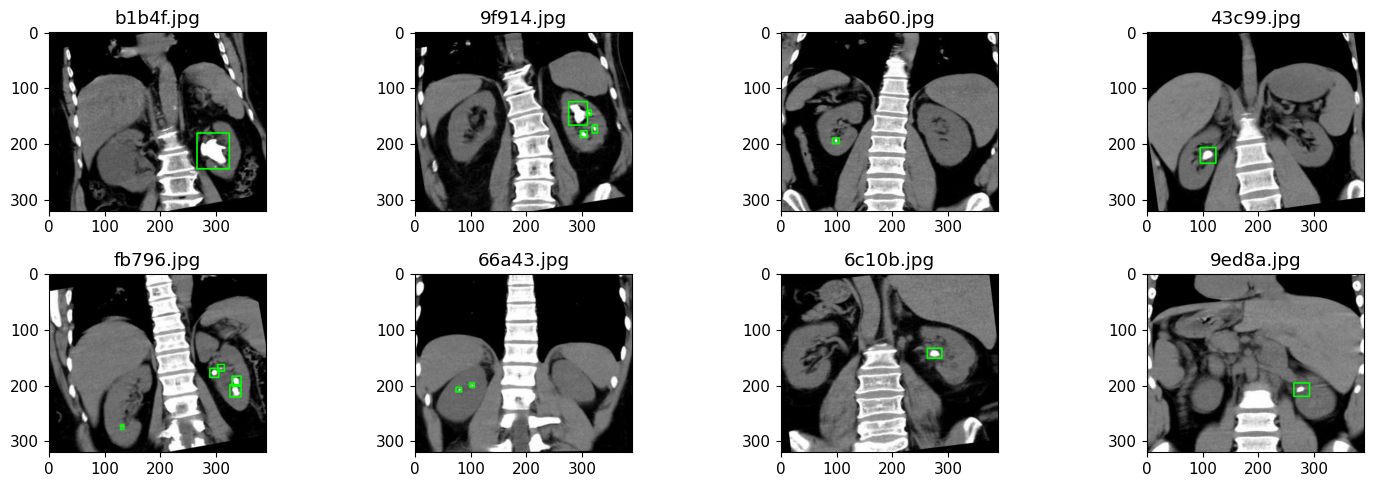

In [53]:
# Visualizing 6 samples with ground truth labels
root = "/content/kidney-stone-images"
subset = "train"
img_samples = glob.glob(os.path.join(root, subset, "images", "*"))[:8]

fig = visualizaing_8samples(img_samples)
fig

<ipython-input-60-94fae3db7f24>:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(2, 4, figsize=(15, 5))



0: 544x640 3 Tas_Vars, 13.3ms
Speed: 6.3ms preprocess, 13.3ms inference, 1.0ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 17.1ms
Speed: 2.9ms preprocess, 17.1ms inference, 1.5ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 3 Tas_Vars, 15.6ms
Speed: 2.8ms preprocess, 15.6ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 16.6ms
Speed: 4.2ms preprocess, 16.6ms inference, 1.7ms postprocess per image at shape (1, 3, 544, 640)


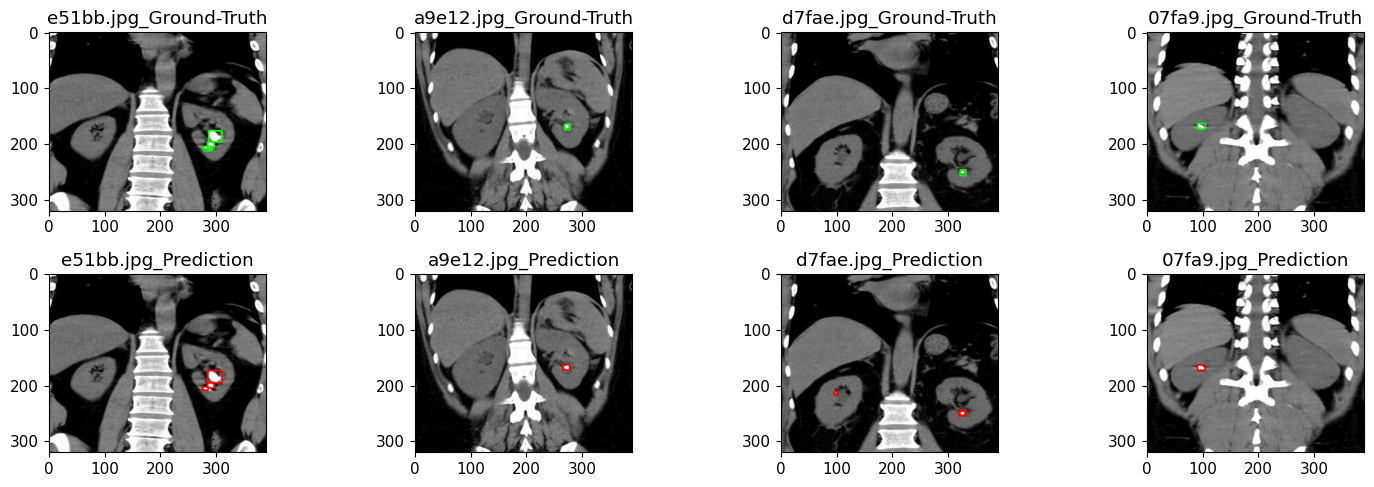

In [62]:
# inference with fine-tuned yolov10 model
subset = "test"
img_samples = glob.glob(os.path.join(root, subset, "images", "*"))[:4]

model = "/content/yolov10_runs/detect/train222/weights/best.pt"
model = YOLOv10(model)
fig = visualizing_4inferences(model, img_samples)
fig


0: 544x640 4 Tas_Vars, 7.7ms
Speed: 2.0ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 3 Tas_Vars, 16.9ms
Speed: 2.7ms preprocess, 16.9ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 10.2ms
Speed: 2.8ms preprocess, 10.2ms inference, 1.7ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 12.9ms
Speed: 2.8ms preprocess, 12.9ms inference, 1.0ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 9.9ms
Speed: 2.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 3 Tas_Vars, 10.8ms
Speed: 2.3ms preprocess, 10.8ms inference, 1.0ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 4 Tas_Vars, 10.3ms
Speed: 5.2ms preprocess, 10.3ms inference, 1.8ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 17.0ms
Speed: 3.6ms preprocess, 17.0ms inference, 1.5ms postprocess per image at shape (

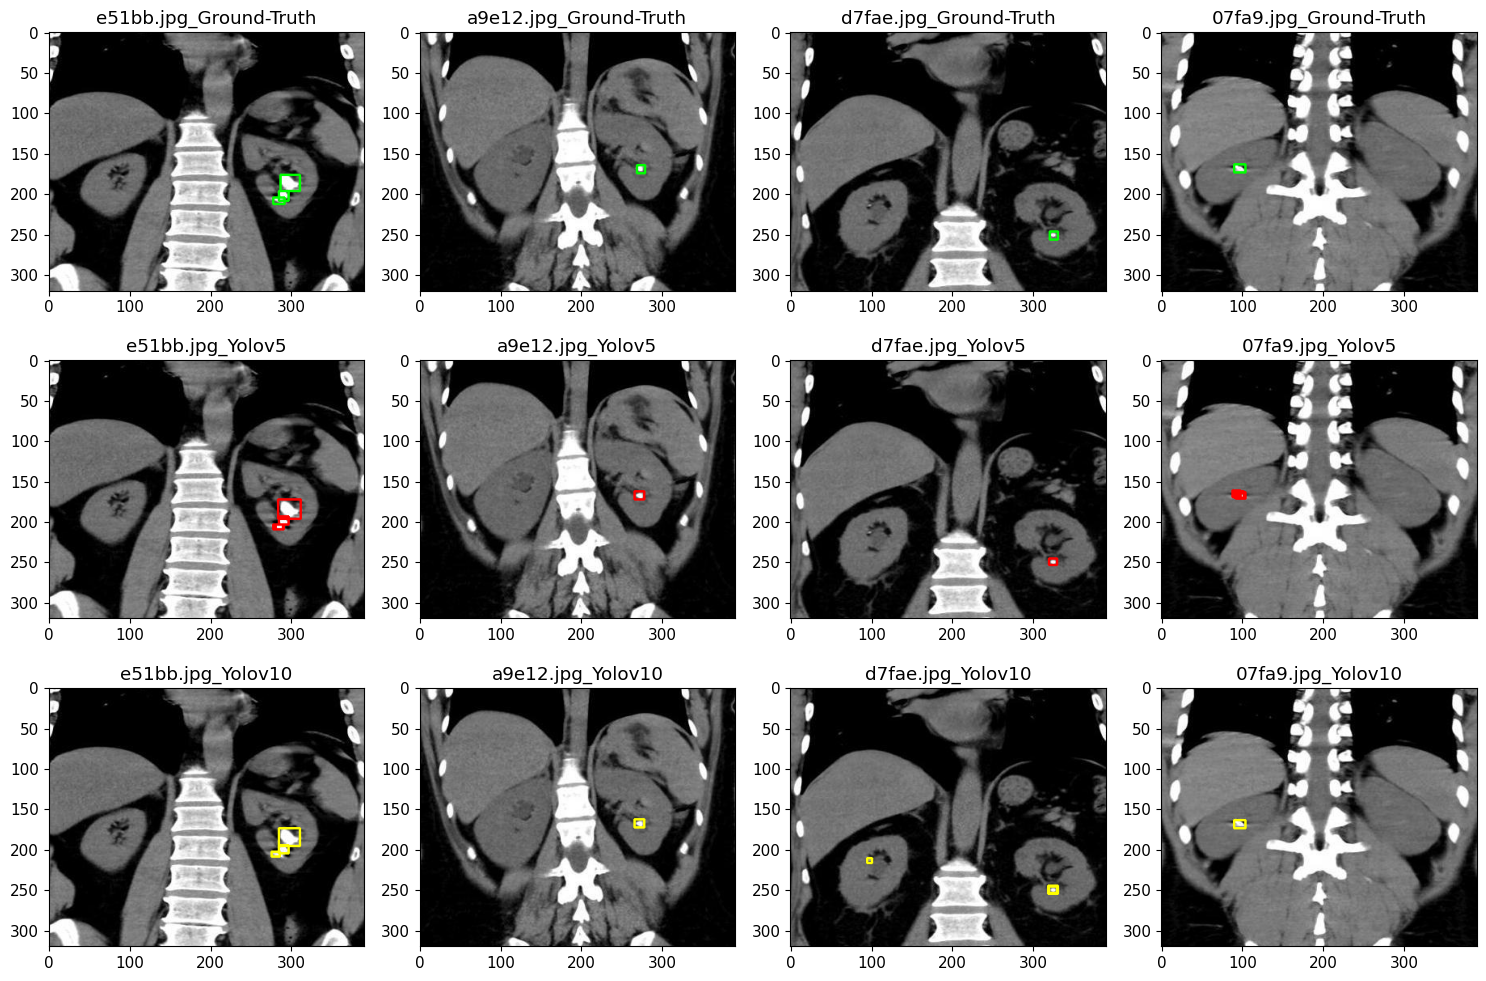

In [63]:
# inference 5 samples by different model
model_v5_path = "/content/yolov5_runs/detect/train/weights/best.pt"
model_v5 = YOLO(model_v5_path)

model_v10_path = "/content/yolov10_runs/detect/train222/weights/best.pt"
model_v10 = YOLOv10(model_v10_path)
model_v10
fig = visualizing_4inferences_with_different_model(img_samples, model_v5, model_v10, model_tags=["Yolov5", "Yolov10"])
fig

# Saving the Models

In [65]:
from google.colab import drive
drive.mount("drive")

Mounted at drive


In [68]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [69]:
! scp -r /content/yolov5_runs /content/drive/MyDrive/KindeyStoneDetection
! scp -r /content/yolov10_runs /content/drive/MyDrive/KindeyStoneDetection